<h1>Esteganografia LSB</h1>

<h3>Importação das Bibliotecas</h3>

In [16]:
import numpy as np
import pandas as pd
from skimage.transform import rescale
import skimage
import bitarray
import math
import cv2
import random
from scipy import fftpack
from skimage.io import imread, imshow, imsave

<h3>Declaração das Funções</h3>

In [17]:
def __messageToBits(message):
    tag = "{:<10}".format(str(len(message)*8))
    message = tag+message
    code = bitarray.bitarray()
    code.frombytes(message.encode('utf-8'))
    code = "".join(['1' if x == True else '0' for x in code.tolist()])
    return code

In [18]:
def __hideMessage(img, message):
    shape = img.shape
    img = img.flatten()
    code = list(message)
    code_len = len(code)
    for i,x in enumerate(img):
        if i*2 <code_len:
            zbits = list('{0:08b}'.format(x))[:6]+code[i*2:i*2+2]
            img[i] = int("".join(zbits), 2)
        else:
            return img.reshape(shape)
    return img.reshape(shape)

In [19]:
def encode(cover_image, secret_message):
    image_height  = cover_image.shape[0]
    image_width   = cover_image.shape[1]
    image_chanels = cover_image.shape[2]

    image_size_bytes = image_height * image_width * image_chanels
    image_size_bits  = image_size_bytes * 8
    image_size_kbytes = image_size_bytes / 1024

    hide_size_bits  = image_size_bytes * 2
    hide_size_kbytes = (hide_size_bits / 8) / 1024

    message_size_kbytes = len(secret_message)/8000

    if message_size_kbytes > hide_size_kbytes:
        raise Exception('Mensagem muito grande!')

    secret_message_bits = __messageToBits(secret_message)

    image_with_message = __hideMessage(cover_image, secret_message_bits)

    return image_with_message

In [20]:
def decode(image):
    bit_message = ""
    bit_count = 0
    bit_length = 200
    for i,x in enumerate(image):
        for j,y in enumerate(x):
            for k,z in enumerate(y):
                zbits = '{0:08b}'.format(z)
                bit_message += zbits[-2:]
                bit_count += 2
                if bit_count == 80:
                    try:
                        decoded_tag = bitarray.bitarray(bit_message).tobytes().decode('utf-8')
                        bit_length = int(decoded_tag)+80
                        bit_message = ""
                    except:
                        raise Exception("Ocorreu um erro ao obter a mensagem!")
                elif bit_count >= bit_length:
                    return bitarray.bitarray(bit_message).tobytes().decode('utf-8')

<h3>Leitura da Imagem de Capa</h3>

In [21]:
imgCapa = imread('../imagem.jpg')

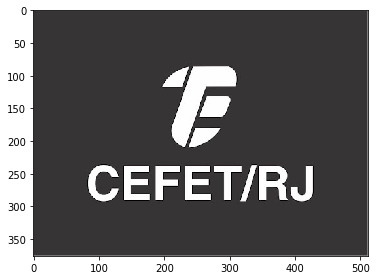

In [22]:
imshow(imgCapa)

<h3>Armazena a string <code><em>Hello World!</em></code> na imagem de capa</h3>
<p>Utilizando a técnica LSB</p>

In [23]:
imgEstg = encode(imgCapa, 'Hello World!')

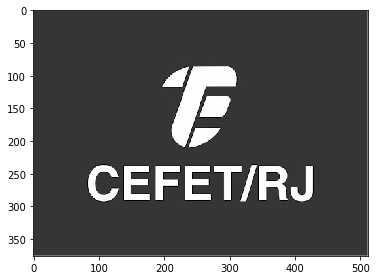

In [24]:
imshow(imgEstg)

<h3>Lê a string contida na imagem de capa</h3>

In [25]:
decode(imgEstg)

'Hello World!'

<h3>Salva a imagem de capa no formato bitmap, lê o arquivo salvo e decodifica novamente a mensagem secreta</h3>

In [26]:
imsave('lsb.bmp', imgEstg)

In [27]:
imgSaved = imread('lsb.bmp')

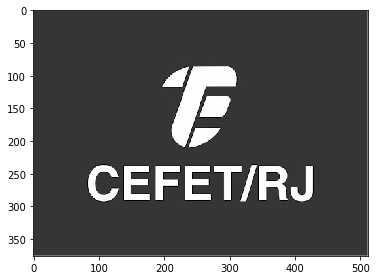

In [28]:
imshow(imgSaved)

In [29]:
decode(imgSaved)

'Hello World!'